### ***1. Importing Needed Libraries:***




In [172]:
import numpy as np
import random
import math
from math import pi
import matplotlib.pyplot as plt
from PIL import Image


### ***2. System Map Initialization:***



In [173]:
X_mini = 0    
X_max = 100
Y_mini = 0
Y_max = 100

### ***3. System Initialization:*** 

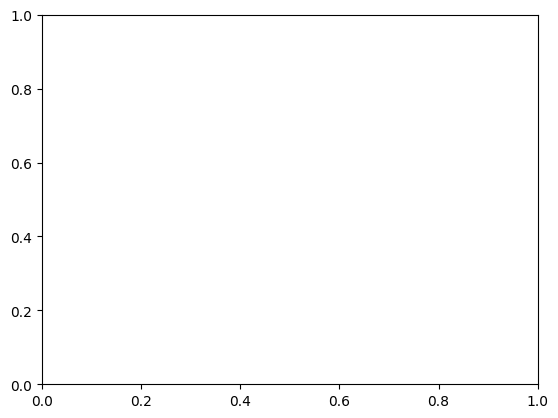

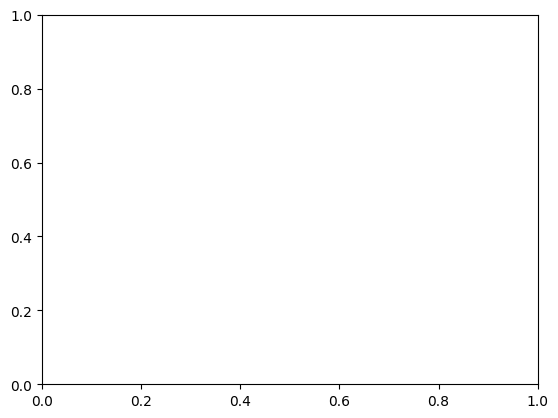

In [174]:
No_of_Towers = 30
No_of_Forbidden_Areas = 4
Spacing_Flag = 0
order = 0
T_X_pos = np.zeros(No_of_Towers)
T_Y_pos = np.zeros(No_of_Towers)
T_radius = np.ones(No_of_Towers)*8
F_radius = np.array([5,10,5,10])
A_map = X_max*Y_max
F_X_pos = np.array([ 20 , 80 , 90 , 30 ])
F_Y_pos = np.array([ 20 , 40 , 80 , 70 ])
color_list =['blue','green', 'yellow' , 'black' , 'maroon' ,'gray' , 'indigo', 'orange' , 'purple', 'pink' ,'brown'] 
Tower_Order = []
RedZones_Order = []
for i in range (0 ,No_of_Towers):
    Tower_Order.append(i)
for i in range (0 ,No_of_Forbidden_Areas):
    RedZones_Order.append(i)
map_fig, map_axes = plt.subplots()
obj_fig, obj_axes = plt.subplots()
No_of_Wolves = 5
Max_no_of_Iterations = 100
Wolves_List  = []
Alpha_Wolf   = []
Beta_Wolf    = []
Delta_Wolf   = []
Omega_Wolves_List = []
Objective_Function_Values = []
New_Omega_Wolves_List = list()
values = list()
X_Coordinates_List =[]
Y_Coordinates_List =[]
X_Coordinates = []
Y_Coordinates =[]


### ***4. Functions Definitions:***


In [175]:
def get_Towers_Area(T_radius):
  A_total = 0
  for i in  range(0,No_of_Towers):
    At = np.pi*pow(T_radius[i],2)
    A_total = At + A_total
  return A_total

def get_forbidden_zones_area(F_radius):
  Af_total = 0
 #Get the Areas Of The Forbidden Areas:
  for i in range(0,No_of_Forbidden_Areas):
    Af = pi*pow(F_radius[i],2)
    Af_total = Af + Af_total
  return Af_total

def get_Specified_Intersected_Area(X_Pos_1 ,Y_Pos_1 ,X_Pos_2 , Y_Pos_2 , Radius_1 , Radius_2):
  centre_distance = np.sqrt(pow(X_Pos_1-X_Pos_2, 2)+pow(Y_Pos_1-Y_Pos_2, 2))
  if (centre_distance > Radius_1 + Radius_2):
    intersected_area = 0
  elif (centre_distance <= abs(Radius_1 - Radius_2)):
      if (Radius_1 >= Radius_2):
          intersected_area = np.pi*pow(Radius_2, 2)
      else: # self.r < other.r
          intersected_area = np.pi*pow(Radius_1, 2)
  else:
    alpha = np.arccos(((Radius_1 * Radius_1) + (centre_distance * centre_distance) - (Radius_2 * Radius_2)) / (2 * Radius_1 * centre_distance)) * 2# 2.0*np.arccos(pow(Radius_1, 2)+pow(centre_distance, 2)-pow(Radius_2, 2)/(2.0* Radius_1*centre_distance))
    Beta  = np.arccos(((Radius_2 * Radius_2) + (centre_distance * centre_distance) - (Radius_1 * Radius_1)) / (2 * Radius_2 * centre_distance)) * 2                                                                                                                                  #2.0*np.arccos(pow(Radius_2, 2)+pow(centre_distance, 2)-pow(Radius_1, 2)/(2.0*Radius_2*centre_distance))
    a1 = 0.5*pow(Radius_2, 2)*(Beta-np.sin(Beta ))
    a2 = 0.5*pow(Radius_1, 2)*(alpha -np.sin(alpha))
    intersected_area = np.floor(a1+a2)
  return intersected_area  

def get_Intersected_Area(T_X_Pos,T_Y_Pos):
  Total_Intersection_Area = 0
  for X , Y  in zip(T_X_Pos , T_Y_Pos):
     Total_Intersection_Area +=get_Specified_Intersected_Area(T_X_Pos[X],T_Y_Pos[Y])     
  return Total_Intersection_Area

def get_Towers_Spacing(X_Pos_1 ,Y_Pos_1 ,X_Pos_2 , Y_Pos_2 ):
  Towers_Spacing = np.sqrt(pow(X_Pos_1-X_Pos_2, 2)+pow(Y_Pos_1-Y_Pos_2, 2))
  return Towers_Spacing

def get_order(Pos ):
  order = Wolves_List.index(Pos) 
  return order

def get_members_fitness(T_X_poss , T_Y_poss ):
  covered_area   = 0
  towers_spacing = 0

   # towers:
  covered_area = get_Towers_Area(T_radius) + get_forbidden_zones_area(F_radius)
  for i in range(0, No_of_Towers-1):   
        for j in range(i, No_of_Towers):
          if (i == j):
              covered_area = covered_area
          else:
            covered_area -=  get_Specified_Intersected_Area(T_X_poss[i],T_Y_poss[i],T_X_poss[j],T_Y_poss[j],T_radius[i],T_radius[j])
            towers_spacing += get_Towers_Spacing(T_X_poss[i],T_X_poss[j],T_Y_poss[i],T_Y_poss[j])

  # RedZones:
  covered_area += get_forbidden_zones_area(F_radius)
  for i in range(0,No_of_Forbidden_Areas-1):
      for j in range(i+1,No_of_Forbidden_Areas):
          covered_area -= get_Specified_Intersected_Area(F_X_pos[i],F_X_pos[j],F_Y_pos[i],F_Y_pos[j],F_radius[i],F_radius[j])

  objective_value = pow(covered_area,1) # + pow(towers_spacing ,2)

  return objective_value
def RedZone_feasibility_check(X_Pos , Y_Pos , Radius  ):
 RedZone_flag = 0 
 for RedZone in RedZones_Order:
    if(get_Specified_Intersected_Area(X_Pos,Y_Pos ,F_X_pos[RedZone],F_Y_pos[RedZone],Radius,F_radius[RedZone]) > 0):
       RedZone_flag = 1 
       break
 if  RedZone_flag !=0                                 : Check = False
 else                                                 : Check = True
 return Check
def feasibility_check(X_Pos , Y_Pos , Radius  ):
 RedZone_flag = 0
 Spacing_flag = 0
 counterr = 0
 X_order = get_order(X_Pos)
 Y_order = get_order(Y_Pos) 
 epslon = 3
 Tower_order = 0
 
 for i in range (0,4):
    if(get_Specified_Intersected_Area(X_Pos,Y_Pos ,F_X_pos[i],F_Y_pos[i],Radius,F_radius[i]) > 0):
       RedZone_flag = 1 
       break
 for i in range ( 0 , 2*No_of_Towers*No_of_Wolves , 2 ):
        Tower_X_order = get_order(Wolves_List[i]  )
        Tower_Y_order = get_order(Wolves_List[i+1])
        if ( Tower_X_order == X_order and Tower_Y_order == Y_order ):
            Spacing_flag = 0
        else:  
            if( get_Specified_Intersected_Area(X_Pos,Y_Pos ,Wolves_List[i],Wolves_List[i+1],Radius,T_radius[0]) < 5 ):
              Spacing_flag = 1
      
            elif(get_Specified_Intersected_Area(X_Pos,Y_Pos ,Wolves_List[i],Wolves_List[i+1],Radius,T_radius[0]) == 0 ):
               Spacing_flag = 0

            elif(get_Towers_Spacing(X_Pos,Y_Pos ,Wolves_List[i],Wolves_List[i+1])> T_radius[0]):
               Spacing_Flag = 2 
            else:
               Spacing_flag = 2  
 
               break 
        
 if    RedZone_flag == 1                               : Check = False
 elif  Spacing_flag ==2                               : Check = False
 else                                                  : Check = True
 return Check
def get_Members_index(Member_Tag,Objective_Function_Array):
  Objective_Function_Values.sort(reverse =False) #descending Order
  if (Member_Tag == "Alpha"):
      for i in range (0 ,No_of_Wolves):
          if (Objective_Function_Array[i] == Objective_Function_Values[0] ):
              return  i
              break
  if (Member_Tag == "Beta"):
      for i in range (0 ,No_of_Wolves):
         if (Objective_Function_Array[i] == Objective_Function_Values[1] ):
              return  i
              break
  if (Member_Tag == "Delta"):
      for i in range (0 ,No_of_Wolves):
          if (Objective_Function_Array[i] == Objective_Function_Values[2] ):
              return  i
              break
def get_Member(Index):
  Member= []
  for j in range(2*No_of_Towers*Index ,2*No_of_Towers*Index + 2*No_of_Towers ):
      Member.append(Omega_Wolves_List[j])
  return Member
def Validate_Coordinates_Constrain():
  for i in range (0, 2*No_of_Towers*No_of_Wolves,2):
    if Wolves_List[i]  < 0 :
        Wolves_List[i] = T_radius[0]
    elif Wolves_List[i] > X_max - T_radius[0] :
         Wolves_List[i] = X_max - T_radius[0] -i
  for i in range (1, 2*No_of_Towers*No_of_Wolves,2):
    if   Wolves_List[i] < 0 :
        Wolves_List[i] = T_radius[0]
    elif  Wolves_List[i] > Y_max - T_radius[0] :
        Wolves_List[i] = Y_max - T_radius[0] -i
def Calculate_Wolves_Fitness():
  X_Coordinates_List.clear()
  Y_Coordinates_List.clear()
  for j in range (0,2*No_of_Towers*No_of_Wolves,2):
          X_Coordinates_List.append(Wolves_List[j])
  for j in range (1,2*No_of_Towers*No_of_Wolves,2):
          Y_Coordinates_List.append(Wolves_List[j])
  for i in range (0,No_of_Wolves*No_of_Towers,No_of_Towers): 
      X_Coordinates.clear()
      Y_Coordinates.clear()
      for j in range (0,No_of_Towers): 
        X_Coordinates.append(X_Coordinates_List[i+j])
        Y_Coordinates.append(Y_Coordinates_List[i+j])
      Objective_Function_Values.append(get_members_fitness(X_Coordinates,Y_Coordinates))
  return Objective_Function_Values    
def Visualize_Solution(Wolves_List):
  fig = plt.gcf()
  axes = fig.gca()
  axes.cla()
  axes.set_xlim((0, X_max))
  axes.set_ylim((0, Y_max))
  axes.set_aspect(1)
  for i in range (0,len(Alpha_Wolf),2):
    axes.add_artist(plt.Circle((Alpha_Wolf[i],Alpha_Wolf[i+1]), T_radius[0],facecolor='blue', edgecolor='black'))
  for i in range(0,No_of_Forbidden_Areas):
    axes.add_artist(plt.Circle((F_X_pos[i], F_Y_pos[i]),F_radius[i], color='r'))
  plt.title('Visualization Map')
  plt.ylabel("Y Coordinate")
  plt.xlabel("X Coordinate")
  plt.show()
  #fig.savefig('Visualization Map.png')
def visualize_objFunc(values):
  obj_axes.plot(values, 'g')
  plt.title('Objective Function')
  obj_fig.savefig('Wolves Objective Function.png')
  plt.show()

### ***5. Gray Wolf Optimization (GWO) Initialization and Approach :***

In [176]:
#Step(1): randomly initialize the Wolves 
def Generate_First_Wolves_Gen():
  wolf = list()
  global Wolves_List
  for j in range(0,No_of_Wolves):
    for i in range(0,No_of_Towers):
        Members_Parameters_list =list()
        T_X_pos[i] = random.randint(T_radius[i],X_max - T_radius[0])
        T_Y_pos[i] = random.randint(T_radius[i],Y_max - T_radius[0])
        Members_Parameters_list.append(T_X_pos[i])
        Members_Parameters_list.append(T_Y_pos[i])
        Wolves_List.append(Members_Parameters_list)
          
  for member in Wolves_List:
    for i in range (0,2):
      wolf.append(member[i])
  Wolves_List.clear()
  Wolves_List = wolf

  for i in range (0,2*No_of_Towers*No_of_Wolves,2):
        while(RedZone_feasibility_check(Wolves_List[i] , Wolves_List[i+1] , T_radius[0]) == False):
          Wolves_List[i]   = random.randint  (T_radius[0],X_max - T_radius[0])
          Wolves_List[i+1] = random.randint  (T_radius[0],Y_max - T_radius[0])   
          
  print("Wolves:" , Wolves_List)  
  Validate_Coordinates_Constrain()       
  return Wolves_List
 
def Social_Hierarchy():
 global Alpha_Wolf
 global Beta_Wolf
 global Delta_Wolf
 global Omega_Wolves_List 
 global Objective_Function_Values
 global values
 Objective_Function_Values.clear()
 Alpha  = list()
 Beta   = list()
 Delta  = list()
 Wolves = list()
 Omega_Wolves_List = Wolves_List.copy()
 #print("Wolves_List", Omega_Wolves_List)
 Objective_Function_Values = Calculate_Wolves_Fitness()
 values.append(max(Objective_Function_Values))
 #print("Objective Funtion", Objective_Function_Values)
 Alpha_Wolf = get_Member(get_Members_index("Alpha",Objective_Function_Values))
 #print("Alpha_Wolf", Alpha_Wolf)
 for member in Alpha_Wolf:
  Omega_Wolves_List.remove(member)
 #print("Wolves_List", Omega_Wolves_List) 
 Beta_Wolf  = get_Member(get_Members_index("Beta" ,Objective_Function_Values))
 for member in Beta_Wolf:
  Omega_Wolves_List.remove(member)
 #print("Wolves_List", Omega_Wolves_List) 
 Delta_Wolf = get_Member(get_Members_index("Delta",Objective_Function_Values))
 for member in Delta_Wolf:
  Omega_Wolves_List.remove(member)
 #print("Wolves_List", Omega_Wolves_List)
 #print("Alpha_Wolf", Alpha_Wolf)
 #print("Beta_Wolf", Beta_Wolf)
 #print("Delta_Wolf", Delta_Wolf)
 
def Grey_Wolf_Optimization():
  iteration = 1
  global Omega_Wolves_List
  global Wolves_List
  D1                    = list()
  D2                    = list()
  D3                    = list()
  X1                    = list()
  X2                    = list()
  X3                    = list()
  C                     = list()
  Omega                 = list()
  New_Wolf              = list()
  Omega_Wolf            = list()
  New_Omega_Wolves_List = list()
  r1 = np.zeros(2*No_of_Towers)
  r2 = np.zeros(2*No_of_Towers)
  a  = np.ones (2*No_of_Towers) 
  while (iteration<= Max_no_of_Iterations):
    Social_Hierarchy()
    Omega_Wolves_Counter = 1
    New_Omega_Wolves_List.clear()  
    while(Omega_Wolves_Counter <= No_of_Wolves-3):                                                  
      Omega_Wolf.clear()             
      New_Wolf.clear()
      Omega.clear()
      #print("wolf no :" ,Omega_Wolves_Counter)
      if (len(Omega_Wolves_List) == 2*No_of_Towers):
        Omega_Wolf = Omega_Wolves_List
      else:
        for i in range (0,2*No_of_Towers):
          Omega_Wolf.append(Omega_Wolves_List[i])
       # print("omega_Wolves_List :" , Omega_Wolves_List)
        for i in range (0,2*No_of_Towers):
          Omega_Wolves_List.remove(Omega_Wolf[i])

      #print("Omega_Wolf [", Omega_Wolves_Counter , "] :" ,Omega_Wolf )
      for i in range(0,2*No_of_Towers):
        r1[i] = random.uniform(0,1)
        #r2[i] = random.uniform(0,1) 
      #print("r1" , r1)
      a = a*(2 - (2/Max_no_of_Iterations)*iteration)
      A = 2*np.multiply(a,r1) - a
      #print("A", A)
      C= 2*r1
      modulus_A = np.linalg.norm(A)
      #print("Modulus A:" , modulus_A)
      D1.extend([abs((a*b)-c) for a,b,c  in zip(C,Alpha_Wolf,Omega_Wolf)])
      D2.extend([abs((a*b)-c) for a,b,c  in zip(C,Beta_Wolf ,Omega_Wolf)])
      D3.extend([abs((a*b)-c) for a,b,c  in zip(C,Delta_Wolf,Omega_Wolf)])

      #print("D1:" , D1)
      #print("D1:" , D2)
      #print("D1:" , D3)

      AD1 = np.array(D1)*modulus_A
      AD2 = np.array(D2)*modulus_A
      AD3 = np.array(D3)*modulus_A
      AD1 = list(AD1)
      AD2 = list(AD2)
      AD3 = list(AD3)

      #print("AD1:" , AD1)
      #print("AD2:" , AD2)
      #print("AD3:" , AD3)

      if (modulus_A < 1):
        #print("Shrinking Encirclement in Progress: ")
        X1.extend([a-b for a,b in zip( Alpha_Wolf,AD1)])
        X2.extend([a-b for a,b in zip( Beta_Wolf ,AD2)])
        X3.extend([a-b for a,b in zip( Delta_Wolf,AD3)])

      else :
        #print("Searching For Prey in Progress: ")
        X1.extend([a+b for a,b in zip( Alpha_Wolf,AD1)])
        X2.extend([a+b for a,b in zip( Beta_Wolf ,AD2)])
        X3.extend([a+b for a,b in zip( Delta_Wolf,AD3)])
        
      #print("X1:" , X1)
      #print("X2:" , X2)
      #print("X3:" , X3)
         
      New_Wolf.extend([(a+b+c)/3 for a,b,c in zip(X1,X2,X3)])
      #print("New_Wolf" , New_Wolf)
      New_Omega_Wolves_List.extend(New_Wolf)
      #print("New_Omega_Wolves:",New_Omega_Wolves_List)
      D1.clear()                 
      D2.clear()                    
      D3.clear()           
      X1.clear()                     
      X2.clear()                     
      X3.clear() 

      Omega_Wolves_Counter +=1
            
    Wolves_List.clear()      
    Wolves_List.extend(Alpha_Wolf)
    Wolves_List.extend(Beta_Wolf )
    Wolves_List.extend(Delta_Wolf)
    Wolves_List.extend(New_Omega_Wolves_List)
    #print("Wolves_List:" , Wolves_List)
    for i in range (0,2*No_of_Towers*No_of_Wolves,2):
        while(feasibility_check(Wolves_List[i] , Wolves_List[i+1] , T_radius[0]) == False):
          Wolves_List[i]   = random.randint  (T_radius[0],X_max - T_radius[0])
          Wolves_List[i+1] = random.randint  (T_radius[0],Y_max - T_radius[0])       
        Validate_Coordinates_Constrain()    
    print("Updated_Wolves_List:" , Wolves_List)
    Visualize_Solution(Wolves_List)
    iteration +=1


  

In [177]:
global values
Generate_First_Wolves_Gen()
Grey_Wolf_Optimization()
print("values :" , values)
visualize_objFunc(values)


Wolves: [55, 61, 11.0, 58.0, 59.0, 53.0, 19.0, 37.0, 60, 10, 62.0, 74.0, 19.0, 43.0, 25.0, 37.0, 11.0, 86.0, 49, 73, 58.0, 47.0, 70.0, 64.0, 82.0, 14.0, 90, 12, 85, 58, 52.0, 50.0, 63, 52, 51.0, 79.0, 24, 37, 55.0, 91.0, 17.0, 57.0, 56.0, 74.0, 47.0, 48.0, 51, 78, 72.0, 16.0, 9.0, 12.0, 46.0, 34.0, 57.0, 86.0, 58, 53, 11.0, 8.0, 18, 56, 79.0, 92.0, 12, 46, 48.0, 89.0, 40.0, 27.0, 67.0, 89.0, 61.0, 85.0, 44.0, 87.0, 47, 30, 20.0, 52.0, 60.0, 53.0, 68.0, 12.0, 55, 33, 82.0, 68.0, 39, 14, 20.0, 53.0, 41, 42, 8.0, 81.0, 54, 77, 76.0, 76.0, 52.0, 38.0, 12.0, 89.0, 63.0, 25.0, 51.0, 44.0, 90.0, 23.0, 60.0, 51.0, 67.0, 76.0, 42.0, 32.0, 35.0, 92.0, 11.0, 47.0, 11, 58, 62.0, 27.0, 46.0, 89.0, 83.0, 13.0, 41.0, 8.0, 35, 32, 81, 89, 77.0, 77.0, 43.0, 47.0, 71.0, 17.0, 29.0, 50.0, 40.0, 25.0, 57, 67, 36.0, 16.0, 54.0, 26.0, 51, 48, 15, 36, 33.0, 12.0, 10.0, 48.0, 14, 8, 70.0, 19.0, 18.0, 48.0, 34, 11, 68, 16, 64, 90, 50, 90, 72.0, 91.0, 62.0, 82.0, 50, 56, 55.0, 14.0, 88.0, 24.0, 59.0, 16.0, 13.0